In [34]:
import pandas as pd # Kütüphaneleri içe aktarıyoruz pandas veri analizi için
import numpy as np #sayısal işlemler ve büyük veri dizileriyle (arrays) çalışmak için kullanılır.
import matplotlib.pyplot as plt #grafikler ve görselleştirmeler oluşturmak için kullanılır.
from sklearn.cluster import KMeans #kümeleme (clustering) algoritmasıdır ve veri setini önceden belirlenmiş sayıda kümelere ayırmak için kullanılır.


In [33]:
data=pd.read_csv('/diabet-sekerHastaligi.csv') #veri dosyasınını not defterimize ekliyoruz.
data.head(10) #verinin ilk 10 satırını görmek için bu komutu kullanıyoruz.

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


In [43]:
Saglikli=data[data.diabetes == 0] #diyabet hastası olmayan kişilerin verilerini Saglikli adlı yeni veri çerçevesinin içine alıyoruz.
Diyabetli=data[data.diabetes == 1]#diyabet hastası olan kişilerin verilerini Diyabetli adlı yeni veri çerçevesinin içine alıyoruz.

In [44]:
Saglikli.info() #bilgilendirme amaçlı ekrana bastırıyoruz.

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        497 non-null    int64
 1   bloodpressure  497 non-null    int64
 2   diabetes       497 non-null    int64
dtypes: int64(3)
memory usage: 15.5 KB


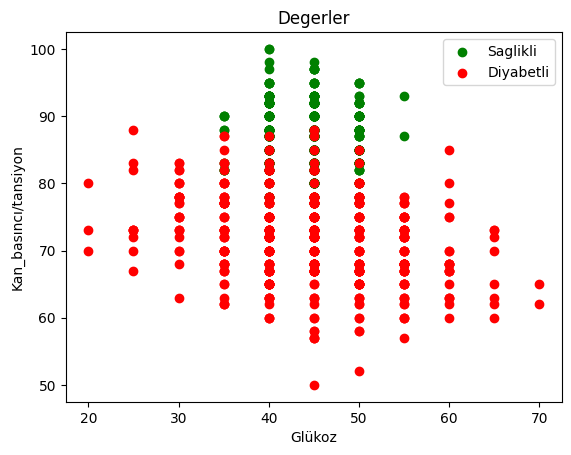

In [47]:
plt.title("Degerler") #matplotlib kütüphanesi ile grafikleştiriyoruz, başlık ardından x ve y kodinantlarını isimlendirip renk atıyoruz
plt.xlabel("Glükoz")
plt.ylabel("Kan_basıncı/tansiyon")

plt.scatter(Saglikli.glucose,Saglikli.bloodpressure,color="green",label="Saglikli")

plt.scatter(Diyabetli.glucose,Diyabetli.bloodpressure,color="red",label="Diyabetli")
plt.legend()
plt.show()

data.drop("diabetes", axis=1): Bu kısım, data veri çerçevesinden diabetes sütununu çıkararak geri kalan tüm sütunları seçer. Bu, özelliklerin (features) setini oluşturur (X).

data.diabetes: Bu kısım, data veri çerçevesinden yalnızca diabetes sütununu seçer. Bu, hedef değişkeni (target) oluşturur (y).

test_size=0.2: Verinin %20'sini test seti, %80'ini ise eğitim seti olarak ayırır. Yani, verinin %20'si modelin performansını değerlendirmek için kullanılacak.

random_state=0: Rastgele sayı üreteci için bir başlangıç değeri belirler. Bu, sonuçların tekrarlanabilir olmasını sağlar.

In [52]:
from sklearn.model_selection import train_test_split #train_test_split fonksiyonunu veriyi eğitim ve test için çağırıyoruz.
x_train,x_test,y_train,y_test=train_test_split(data.drop("diabetes",axis=1),data.diabetes,test_size=0.2,random_state=0) #veriyi eğitim ve test setlerine ayırma işlemini gerçekleştiriyoruz.

In [53]:
print(x_train) #eğitim setini ekrana yazdırıyoruz

     glucose  bloodpressure
864       45             73
874       45             60
878       40             87
113       55             60
608       45             73
..       ...            ...
835       40             65
192       45             85
629       40             83
559       50             90
684       50             75

[796 rows x 2 columns]


In [54]:
print(y_train)

864    1
874    1
878    0
113    1
608    1
      ..
835    1
192    0
629    0
559    0
684    1
Name: diabetes, Length: 796, dtype: int64


from sklearn.neighbors import KNeighborsClassifier: Bu satır, scikit-learn kütüphanesinden KNeighborsClassifier sınıfını içe aktarır. Bu sınıf, KNN algoritmasının uygulanması için kullanılır.

knn=KNeighborsClassifier(n_neighbors=3): Burada KNeighborsClassifier sınıfından bir örnek (knn) oluşturuluyor. n_neighbors=3 parametresi, modelin 3 en yakın komşuyu dikkate alacağını belirtir.

knn.fit(x_train,y_train): Bu satır, modeli x_train (eğitim verileri) ve y_train (etiketler) kullanarak eğitir. fit metodu, modeli verilen verilerle eğitir.

tahmin=knn.predict(x_test): Bu satır, eğitimli modeli kullanarak x_test (test verileri) için tahminlerde bulunur ve sonuçları tahmin değişkeninde saklar.kalın metin

In [57]:
#modelimiz
from sklearn.neighbors  import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
tahmin=knn.predict(x_test)


In [58]:
print(tahmin)

[1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 1]


In [60]:
print(list(y_test))

[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [61]:
knn.score(x_test,y_test) #doğruluk oranımız.

0.8894472361809045